# Scipy

In [1]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [2]:
Months=[i+1 for i in range(len(Max))]
Months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [3]:
import matplotlib.pyplot as plt
import numpy as np

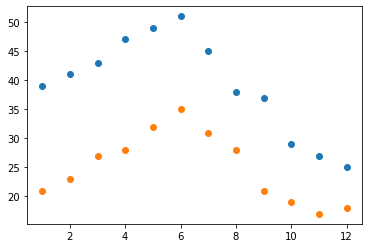

In [4]:
plt.scatter(Months,Max)
plt.scatter(Months,Min)
plt.show()

In [5]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Months, Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Months, Min, [-40, 20, 0])

In [6]:
optimize.curve_fit(yearly_temps, Months, Max, [20, 10, 0])

(array([ 39.25      , -11.01878019,   0.97111097]),
 array([[ 7.38600934e-01, -2.66357633e-09, -1.81591501e-09],
        [-2.66357633e-09,  1.47720186e+00, -6.31484449e-09],
        [-1.81591501e-09, -6.31484449e-09,  4.43788037e-02]]))

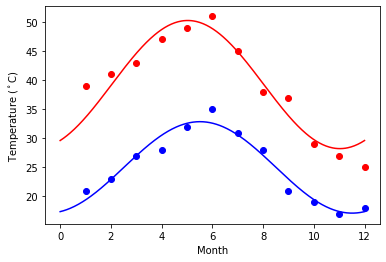

In [7]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Matplotlib

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [15]:
import pandas as pd

In [27]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url,skip_blank_lines=True)
#df = df.dropna()

In [28]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


([<matplotlib.patches.Wedge at 0x1d176b2f048>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60%')])

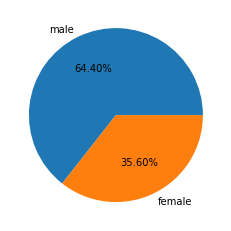

In [29]:
plt.pie(df.sex.value_counts(),labels=df.sex.value_counts().index,autopct='%1.2f%%')

In [52]:
df.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [45]:
df = df[df['sex'].notna()]

In [47]:
df['sex'].iloc[:-1].apply(lambda x:colors[x])

0       pink
1       blue
2       pink
3       blue
4       pink
        ... 
1303    blue
1304    pink
1305    pink
1306    blue
1307    blue
Name: sex, Length: 1308, dtype: object

In [39]:
df2 = df.drop(['pclass', 'survived', 'name', 'sibsp', 'parch', 'ticket','cabin', 'embarked', 'boat', 'body', 'home.dest'],axis=1)
df2 = df2.dropna()
df2.sex = pd.get_dummies(df2.sex)
df2.head()

,sex,age,fare
0,1,29.0000,211.3375
1,0,0.9167,151.5500
2,1,2.0000,151.5500
3,0,30.0000,151.5500
4,1,25.0000,151.5500


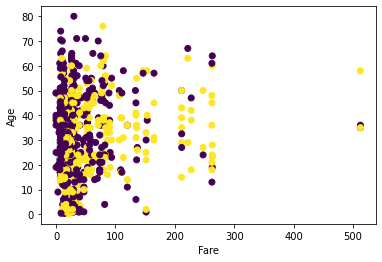

In [43]:
fig, ax = plt.subplots()
plt.xlabel('Fare')
plt.ylabel('Age')
#colors = {'male':'blue','female':'pink'}
ax.scatter(df2['fare'],df2['age'],c=df2.sex)
plt.show()